In [13]:
import pandas as pd
import random
import numpy as np
import spacy
from tqdm import tqdm
from pprint import pprint
import re
import os
import time
import pickle
import tensorflow as tf
import tensorflow_hub as hub
import nltk
import nltk.data
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import line_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.chunk import tree2conlltags
from sklearn.model_selection import train_test_split
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk import PorterStemmer
from nltk.stem.porter import *
from gensim import corpora, models
from wordcloud import WordCloud, STOPWORDS
import nltk, math, codecs
from gensim.models import Doc2Vec
from nltk.cluster.kmeans import KMeansClusterer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
pd.set_option('display.max_colwidth', 200)
from nltk.collocations import *
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [14]:
n=322963
s=100000
random.seed(17)
skip = sorted(random.sample(range(n),n-s))
data = pd.read_csv("/Users/sbalas203/Downloads/Flex_activation/Billing_phrases.csv", skiprows=skip, header=0)
data.columns = ['Phrase']

In [15]:
data.head(5)

,Phrase
0,OVER FOR <UNK> ... <UNK> ... SO ... IN JANUARY SO ... YOU ... TO ... GIVE US BACK TO CALL AND UH ... I ... CAN GUARANTEE YOU THAT WOULD BE ARE GOING ... THAT ... QUICKLY AS POSSIBLE OK
1,THANK YOU AND I'M SPEAKING TO ... MISS GREGORY
2,THAT IS LONG AS I HAVE XFINITY ... BECAUSE YOU KNOW UM YOU KNOW 'CAUSE THE XFINITY WIFI THEN YOU KNOW AND STUFF LIKE THAT ... THAT ... I ... I HAVE A FIREWALL ... YES
3,HELLO MA'AM THAT ... I'M HERE ... YEAH THANK
4,BECAUSE ONE OF MY TV IS ... ON ... IT HAPPENED IN THE ONE OF MY TV ... DID NOT COME ON BECAUSE OF THAT


In [5]:
data.count()

Phrase    100000
dtype: int64

In [6]:
def lemmatize_stemming(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [7]:
from gensim.parsing.porter import PorterStemmer
def lemmatize_stemming(text):
    return PorterStemmer().stem(text)

In [8]:
processed_docs = data['Phrase'].map(preprocess)
processed_docs[:20]

0                                        [januari, guarante, go, quickli, possibl]
1                                                    [thank, speak, miss, gregori]
2     [long, xfiniti, know, know, caus, xfiniti, wifi, know, stuff, like, firewal]
3                                                             [hello, yeah, thank]
4                                                                   [happen, come]
5                                                                 [michael, todai]
6                                                    [show, monthli, rate, nineti]
7                                                                   [thank, choos]
8                                                                           [past]
9                  [bear, recap, appreci, gonna, ahead, send, text, messag, gonna]
10                                                           [get, avail, xfiniti]
11                                           [week, hello, actual, turn, cellphon]
12  

In [9]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 go
1 guarante
2 januari
3 possibl
4 quickli
5 gregori
6 miss
7 speak
8 thank
9 caus
10 firewal


In [10]:
dictionary.filter_extremes(no_below=5, no_above=0.4, keep_n=10000)

In [11]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[2]

[(8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2)]

In [12]:
bow_doc_1 = bow_corpus[100]
for i in range(len(bow_doc_1)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_1[i][0], 
                                               dictionary[bow_doc_1[i][0]], 
bow_doc_1[i][1]))

Word 11 ("like") appears 2 time.
Word 52 ("custom") appears 1 time.
Word 90 ("march") appears 1 time.
Word 106 ("right") appears 1 time.
Word 200 ("number") appears 1 time.
Word 296 ("seventeen") appears 1 time.


In [13]:
#LDA using bag of words
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(5,4):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.071*"payment" + 0.039*"account" + 0.034*"gonna" + 0.023*"right"
Topic: 1 
Words: 0.070*"know" + 0.062*"like" + 0.026*"account" + 0.020*"number"
Topic: 2 
Words: 0.029*"channel" + 0.028*"look" + 0.023*"know" + 0.020*"right"
Topic: 3 
Words: 0.052*"dollar" + 0.036*"month" + 0.027*"nineti" + 0.023*"like"
Topic: 4 
Words: 0.102*"thank" + 0.053*"seven" + 0.044*"todai" + 0.040*"call"


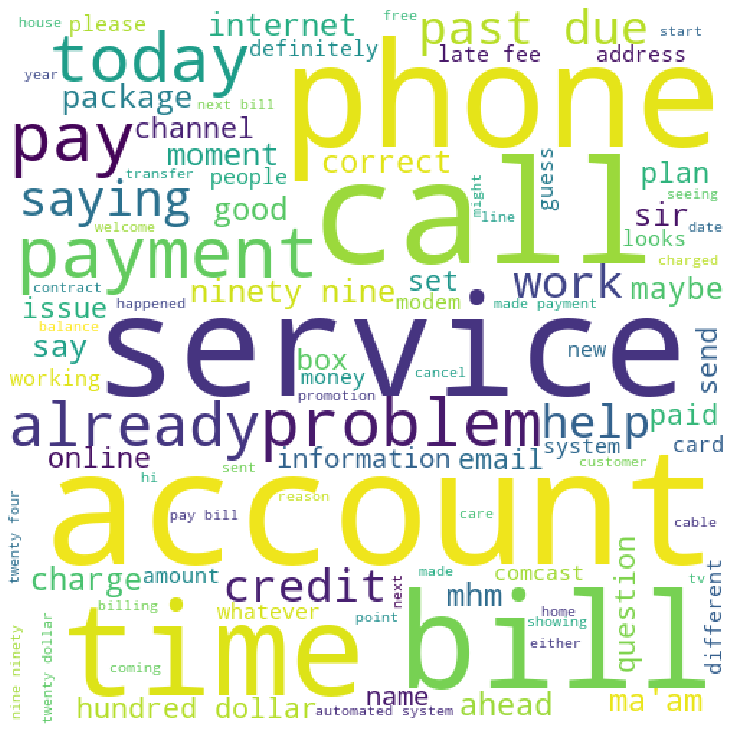

In [14]:
comment_words = ' '
stopwords = set(STOPWORDS) 
#Specify a list of stop words to remove
more_stops=['I','say','wanna','hello','na','gon','get','uh','right','guy','still','come','say','someth','mean','um','oh','yes','bye','great','yeah','no','sorry','ok','okay','thank','like','alright','know','a',
 'about','above','after','again','against','all','also','am','an','and','any','are',"aren't",'as', 'at','be','because','been','before','being','below','between','both','but','by','can',"can't",
            'cannot','com','could',"couldn't",'did', 'ye','my','pai','finity',
            "didn't",'do','does', "doesn't",'doing',"don't",'down','during','each','else','ever', 'few','for','from','further','get','had',"hadn't",'has',"hasn't",'have',"haven't",
'having','he',"he'd","he'll","he's",'her','here',"here's",'hers','herself','him','himself','his','how',"how's",'however','http','i',"i'd","i'll","i'm","i've",'if','in','into','is',"isn't",
 'it',"it's",'its','itself','just','k',"let's",'like','me','more','most',"mustn't",'my','myself','no','nor','not','of','off','on','once','only','or','other','otherwise','ought','our','ours','ourselves',
            'out','over','own','r','same','f',"yes","may","be","s",
            'shall',"shan't",'she',"she'd","she'll","she's","<UNK>","...",
 'should',"shouldn't",'since','so','some','such','than','that',"that's",'the','their','theirs','them','themselves','then','there',"there's",'these','they',"they'd","they'll","they're","they've",'this','those',
            'through','to',"fr","pe",
 'too','under','until','up','very','was','said',"wasn't",'we','got', "we'd","we'll","we're","we've",'were',"weren't",'what',"what's",'when',"when's",'where',"where's",'which','while','who',"who's",'whom',
'why',"why's",'with',"won't",'would',"wouldn't",'www','you',"you'd","you'll","you're","you've",'your','yours','yourself','yourselves','going','see','nothing','well','one','want', 'us', 'for', 'am', 'say', 'and', 'been',
              'someone', 'that', 'so', 'for', 'why', 'am', 'or', 'else', 'main', 'if', 'need', 'do','unk',
              'know', 'want', 'them', 'back', 'will', 'all', 'keep', 'a', 's', 'too', 'at', 'way', 'with',"gonna",
              'when', 'we', 'with', 'since', 'at', 'does', 're', 'when', 'give', 'talk', 'got','kinda',
              'them', 'someone', 'told', 'back', 'way', 'is', 'too', 'its', 'much', 'going', 'keeps',
              'goes', 'every', 'went', 'and', 'been', 'with', 'some', 've', 'we', 'a', 'had', 'and','let','anything','allows','cause',
      'on', 'all', 'see', 'make', 'say', 'us', 's', 'came','lot','able','takes','think','it','i','try','bit','for',
             'thats','much','getting','really','now','t','turn','for','me',' t','it','getting','now',' me',' t','  t','much',
             'days','now','thought','thats','fact','looking','choose','thing','enough','overall','fine','far',
             'everytime','whenever','always','long','alot','needed','recently','wish','done','usually',"go","say","look","laughter",
              'sometimes','pretty','month','year','im','change','hold','trying','l','1','ou','d','putting','put',
              'didnt','comes','come','needs','need','seems','seem','tried','try','mostly','sure','certain',
              'cant','can','wanted','want','changes','change','last','first','several','couple','took','take','times',
              'prices','paying','though','thought','feel','live','another','depends','choices',"it'll",
              'day','minute','minutes','everything','options','better','compared','calling','quickly','week',
              'speak','hours','person','day','faster','less','ten','show','night','theres','part','yet','number',
              'ive','weeks','asked','ask','stuff','little','almost','beleive','believe','dont','somebody',
              'using', 'never','happens','three','five','two','ago','constantly','basically','around','used',
              'others','probably','quite','except','everyone','lost','extremely','higher','wait','tell','kind',
              'end','something','others','job','months','wrong','check','lately','even','provide','actually',
              'job','changing','everybody','second','gets','many','find','supposed','without','taken','gone','cuts',
              'called','use','many','guys','things','whole','anymore','big','understand','rip','realized','robert','kyle','curtis','letting',
              'becoming','depend','elsewhere','effect','letting','tells','sixth','st','stating','st','somehow','frankly','body','originally','op','must'
              ,'automatically','steve','fi','include','anyways'] 

stop_words = set(nltk.corpus.stopwords.words('english')+more_stops)


# iterate through the csv file 
for val in data.Phrase: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 

In [10]:
more_stops=['I','say','wanna','hello','na','gon','get','uh','right','guy','still','come','say','someth','mean','um','oh','yes','bye','great','yeah','no','sorry','ok','okay','thank','like','alright','know','a',
 'about','above','after','again','against','all','also','am','an','and','any','are',"aren't",'as', 'at','be','because','been','before','being','below','between','both','but','by','can',"can't",
            'cannot','com','could',"couldn't",'did', 'ye','my','pai','finity',
            "didn't",'do','does', "doesn't",'doing',"don't",'down','during','each','else','ever', 'few','for','from','further','get','had',"hadn't",'has',"hasn't",'have',"haven't",
'having','he',"he'd","he'll","he's",'her','here',"here's",'hers','herself','him','himself','his','how',"how's",'however','http','i',"i'd","i'll","i'm","i've",'if','in','into','is',"isn't",
 'it',"it's",'its','itself','just','k',"let's",'like','me','more','most',"mustn't",'my','myself','no','nor','not','of','off','on','once','only','or','other','otherwise','ought','our','ours','ourselves',
            'out','over','own','r','same','f',"yes","may","be","s",
            'shall',"shan't",'she',"she'd","she'll","she's","<UNK>","...",
 'should',"shouldn't",'since','so','some','such','than','that',"that's",'the','their','theirs','them','themselves','then','there',"there's",'these','they',"they'd","they'll","they're","they've",'this','those',
            'through','to',"fr","pe",
 'too','under','until','up','very','was','said',"wasn't",'we','got', "we'd","we'll","we're","we've",'were',"weren't",'what',"what's",'when',"when's",'where',"where's",'which','while','who',"who's",'whom',
'why',"why's",'with',"won't",'would',"wouldn't",'www','you',"you'd","you'll","you're","you've",'your','yours','yourself','yourselves','going','see','nothing','well','one','want', 'us', 'for', 'am', 'say', 'and', 'been',
              'someone', 'that', 'so', 'for', 'why', 'am', 'or', 'else', 'main', 'if', 'need', 'do','unk',
              'know', 'want', 'them', 'back', 'will', 'all', 'keep', 'a', 's', 'too', 'at', 'way', 'with',"gonna",
              'when', 'we', 'with', 'since', 'at', 'does', 're', 'when', 'give', 'talk', 'got','kinda',
              'them', 'someone', 'told', 'back', 'way', 'is', 'too', 'its', 'much', 'going', 'keeps',
              'goes', 'every', 'went', 'and', 'been', 'with', 'some', 've', 'we', 'a', 'had', 'and','let','anything','allows','cause',
      'on', 'all', 'see', 'make', 'say', 'us', 's', 'came','lot','able','takes','think','it','i','try','bit','for',
             'thats','much','getting','really','now','t','turn','for','me',' t','it','getting','now',' me',' t','  t','much',
             'days','now','thought','thats','fact','looking','choose','thing','enough','overall','fine','far',
             'everytime','whenever','always','long','alot','needed','recently','wish','done','usually',"go","say","look","laughter",
              'sometimes','pretty','month','year','im','change','hold','trying','l','1','ou','d','putting','put',
              'didnt','comes','come','needs','need','seems','seem','tried','try','mostly','sure','certain',
              'cant','can','wanted','want','changes','change','last','first','several','couple','took','take','times',
              'prices','paying','though','thought','feel','live','another','depends','choices',"it'll",
              'day','minute','minutes','everything','options','better','compared','calling','quickly','week',
              'speak','hours','person','day','faster','less','ten','show','night','theres','part','yet','number',
              'ive','weeks','asked','ask','stuff','little','almost','beleive','believe','dont','somebody',
              'using', 'never','happens','three','five','two','ago','constantly','basically','around','used',
              'others','probably','quite','except','everyone','lost','extremely','higher','wait','tell','kind',
              'end','something','others','job','months','wrong','check','lately','even','provide','actually',
              'job','changing','everybody','second','gets','many','find','supposed','without','taken','gone','cuts',
              'called','use','many','guys','things','whole','anymore','big','understand','rip','realized','robert','kyle','curtis','letting',
              'becoming','depend','elsewhere','effect','letting','tells','sixth','st','stating','st','somehow','frankly','body','originally','op','must'
              ,'automatically','steve','fi','include','anyways'] 

stop_words = set(nltk.corpus.stopwords.words('english')+more_stops)

In [11]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Convert to list
data = data.Phrase.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:2])

<>:5: DeprecationWarning: invalid escape sequence \S
<>:8: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \S
<>:8: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \S
<>:8: DeprecationWarning: invalid escape sequence \s
<ipython-input-12-91bcecab34ce>:5: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
<ipython-input-12-91bcecab34ce>:8: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


['OVER FOR <UNK> ... <UNK> ... SO ... IN JANUARY SO ... YOU ... TO ... GIVE US '
 'BACK TO CALL AND UH ... I ... CAN GUARANTEE YOU THAT WOULD BE ARE GOING ... '
 'THAT ... QUICKLY AS POSSIBLE OK',
 'THANK YOU AND IM SPEAKING TO ... MISS GREGORY']


In [17]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['over', 'for', 'unk', 'unk', 'so', 'in', 'january', 'so', 'you', 'to', 'give', 'us', 'back', 'to', 'call', 'and', 'uh', 'can', 'guarantee', 'you', 'that', 'would', 'be', 'are', 'going', 'that', 'quickly', 'as', 'possible', 'ok']]


In [18]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

['thank', 'you', 'and', 'im', 'speaking', 'to', 'miss', 'gregory']


In [19]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [20]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

[['call', 'guarantee', 'possible'], ['speak']]


In [21]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [22]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True)

In [23]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.076*"payment" + 0.036*"today" + 0.031*"send" + 0.030*"s" + '
  '0.028*"address" + 0.025*"problem" + 0.024*"name" + 0.024*"email" + '
  '0.024*"make" + 0.022*"ahead"'),
 (1,
  '0.075*"dollar" + 0.061*"pay" + 0.053*"account" + 0.053*"bill" + '
  '0.034*"call" + 0.031*"say" + 0.028*"charge" + 0.026*"time" + 0.022*"box" + '
  '0.020*"balance"'),
 (2,
  '0.056*"service" + 0.049*"work" + 0.046*"internet" + 0.032*"good" + '
  '0.026*"money" + 0.026*"package" + 0.024*"channel" + 0.021*"customer" + '
  '0.021*"cable" + 0.018*"home"'),
 (3,
  '0.105*"be" + 0.054*"phone" + 0.037*"will" + 0.035*"credit" + 0.028*"card" + '
  '0.027*"ill" + 0.026*"help" + 0.024*"tv" + 0.017*"people" + 0.015*"watch"')]


In [24]:
#model evaluation
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.418444267589923

Coherence Score:  0.5255114619288619


In [25]:
lda_model.top_topics(bow_corpus)

[([(0.07453812, 'dollar'),
   (0.06084513, 'pay'),
   (0.052899096, 'account'),
   (0.052679453, 'bill'),
   (0.03437426, 'call'),
   (0.031383514, 'say'),
   (0.028021961, 'charge'),
   (0.025752215, 'time'),
   (0.022130571, 'box'),
   (0.019967547, 'balance'),
   (0.018779766, 'due'),
   (0.016877925, 'new'),
   (0.016418222, 'fee'),
   (0.01630349, 'next'),
   (0.016165871, 'already'),
   (0.015468568, 'cent'),
   (0.0125258155, 'amount'),
   (0.012099497, 'late'),
   (0.010829628, 'set'),
   (0.009975428, 'question')],
  -6.546750036950401),
 ([(0.10466623, 'be'),
   (0.053965297, 'phone'),
   (0.03695288, 'will'),
   (0.0346608, 'credit'),
   (0.027615413, 'card'),
   (0.02693532, 'ill'),
   (0.025619257, 'help'),
   (0.023606077, 'tv'),
   (0.016950222, 'people'),
   (0.014951601, 'watch'),
   (0.013621798, 'happen'),
   (0.013594519, 'start'),
   (0.013483023, 'online'),
   (0.0118820155, 'year'),
   (0.011044057, 'transfer'),
   (0.0103228865, 'speak'),
   (0.010039118, 'talk'

In [26]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.405598 -0.001175       1        1  32.941227
0     -0.145095 -0.331853       2        1  23.409639
3     -0.116320  0.012309       3        1  22.101688
2     -0.144182  0.320719       4        1  21.547443, topic_info=    Category          Freq       Term         Total  loglift  logprob
19   Default  10343.000000         be  10343.000000  30.0000  30.0000
46   Default  10979.000000     dollar  10979.000000  29.0000  29.0000
61   Default   8001.000000    payment   8001.000000  28.0000  28.0000
36   Default   8962.000000        pay   8962.000000  27.0000  27.0000
59   Default   7792.000000    account   7792.000000  26.0000  26.0000
..       ...           ...        ...           ...      ...      ...
17    Topic4    792.820740  available    793.641479   1.5339  -4.8001
468   Topic4    759.773621   discount    760.603516   1.5338  -4.8426
251   Topic4    754.460266    comcast    755.286804   1.5338  -4.8497
294   Topic4    750.320801    regular    751.153259   1.5338  -4.8552
253   Topic4    726.056091       deal    726.888611   1.5338  -4.8880

[152 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
340       2  0.999260   access
59        1  0.999865  account
40        1  0.999431      add
24        2  0.999853  address
13        2  0.999582    ahead
...     ...       ...      ...
69        4  0.999862     work
547       3  0.998485    worry
81        2  0.999398    would
18        1  0.999217  xfinity
799       3  0.999133     year

[122 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])

In [16]:
#start from beginning as pandas dataframe
# Cleaing the text for skip gram model
data = data.to_string()
data = data.lower()
data = re.sub('[^a-zA-Z]', ' ', data )
data = re.sub(r'\s+', ' ', data)

# Preparing the dataset
all_sentences = nltk.sent_tokenize(data)

all_words = [nltk.word_tokenize(sent) for sent in all_sentences]
#stop_words = set(nltk.corpus.stopwords.words('english')+more_stops)
# Removing Stop Words
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stop_words]

In [17]:
#Skip Gram
model = gensim.models.Word2Vec(all_words, min_count = 1, size = 100, 
                                             window = 7, sg = 1, workers=5)

In [18]:
#Flex
model.wv.most_similar(positive=['bill','billing','payment'],topn=300)

[('firs', 0.8816081285476685),
 ('structure', 0.8729498982429504),
 ('timeframe', 0.8728886246681213),
 ('draft', 0.8715927600860596),
 ('chatting', 0.8710362911224365),
 ('preferences', 0.8693955540657043),
 ('bombs', 0.8673052787780762),
 ('filed', 0.8660735487937927),
 ('lead', 0.8658382892608643),
 ('jess', 0.8646537065505981),
 ('successful', 0.86374831199646),
 ('toda', 0.8636573553085327),
 ('brandy', 0.8636274337768555),
 ('bout', 0.8636017441749573),
 ('communicating', 0.863503634929657),
 ('twen', 0.8632601499557495),
 ('spread', 0.8628250360488892),
 ('numb', 0.862217366695404),
 ('printing', 0.8621628284454346),
 ('notices', 0.8620836734771729),
 ('questi', 0.8620733618736267),
 ('needing', 0.8618974685668945),
 ('texts', 0.8616080284118652),
 ('chatted', 0.8612460494041443),
 ('knocked', 0.8612087965011597),
 ('resent', 0.861099123954773),
 ('billi', 0.8605568408966064),
 ('intention', 0.8605288863182068),
 ('forms', 0.8605258464813232),
 ('kicked', 0.8601312637329102),
 (

In [19]:
model.wv.most_similar(negative=['bill','billing','payment'],topn=300)

[('fox', -0.3574448823928833),
 ('sports', -0.3731216788291931),
 ('stick', -0.38508397340774536),
 ('control', -0.39845606684684753),
 ('disney', -0.39991986751556396),
 ('family', -0.40677016973495483),
 ('turner', -0.4083269238471985),
 ('remote', -0.4093093276023865),
 ('local', -0.4143922030925751),
 ('prime', -0.4190123379230499),
 ('network', -0.4190477728843689),
 ('slash', -0.42073923349380493),
 ('smart', -0.4250932037830353),
 ('california', -0.4265982508659363),
 ('texas', -0.4268665313720703),
 ('enjoy', -0.4300963878631592),
 ('modem', -0.4311485290527344),
 ('recorder', -0.4317111372947693),
 ('data', -0.43172186613082886),
 ('mega', -0.43241655826568604),
 ('download', -0.4324609041213989),
 ('hulu', -0.43258529901504517),
 ('roku', -0.43326520919799805),
 ('kids', -0.43396666646003723),
 ('ups', -0.43670713901519775),
 ('classic', -0.43753600120544434),
 ('terabyte', -0.4378908574581146),
 ('social', -0.4382827877998352),
 ('bytes', -0.43904775381088257),
 ('security',

In [20]:
model.wv.most_similar('bill', topn=500)

[('proration', 0.8025006055831909),
 ('timeframe', 0.7852557897567749),
 ('frozen', 0.7822821140289307),
 ('discussing', 0.7820677161216736),
 ('onl', 0.7810095548629761),
 ('statements', 0.780009388923645),
 ('casino', 0.780001163482666),
 ('prepared', 0.7785272598266602),
 ('euro', 0.7778857946395874),
 ('concert', 0.7777454257011414),
 ('communicating', 0.7768549919128418),
 ('confuse', 0.7766489386558533),
 ('successful', 0.7762179374694824),
 ('remark', 0.7759525179862976),
 ('instant', 0.7758689522743225),
 ('payed', 0.7753371000289917),
 ('texts', 0.7744079232215881),
 ('overage', 0.772905707359314),
 ('collection', 0.7723032832145691),
 ('prorate', 0.7722519636154175),
 ('incurred', 0.7719607353210449),
 ('bil', 0.7717376947402954),
 ('equal', 0.771578311920166),
 ('intention', 0.7713401913642883),
 ('balanc', 0.7712918519973755),
 ('catching', 0.7712692618370056),
 ('fired', 0.7712408900260925),
 ('clarifying', 0.7710376977920532),
 ('hassle', 0.7706615924835205),
 ('unemploye

In [ ]:
'''Main Topics:
1) Concerned on overpayment and how its adjusted ( high bill escalation)
2) Tech Installments
3) End current contract (disconnects i think)
4) Bill due date explanations (change if possible)
5) Request on free equipment transfer
6) Monthly deal offers
7) Reimbursement
8) Late fee waiver for past due


Topics not related to billing in billing calls are : 
1) amazon prime membership on x1
2) purchase music ( not sure what this is about)
3) roku
4) movie rentals
5) gigabit
6) Hulu
7) premium channels inquiry
8) Parental controls settings
'''